In [99]:
import pandas as pd


In [100]:
data=pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [101]:
data.shape

(398, 9)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [103]:
data=data.drop(columns=['car name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [105]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [106]:
data["horsepower"]=data["horsepower"].replace("?",0)
data["horsepower"]=data["horsepower"].astype("int")

In [107]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [108]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


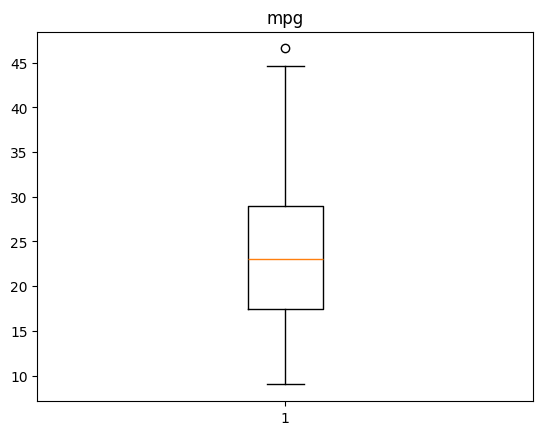

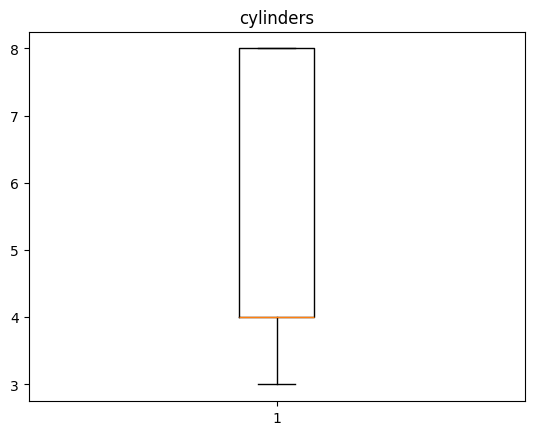

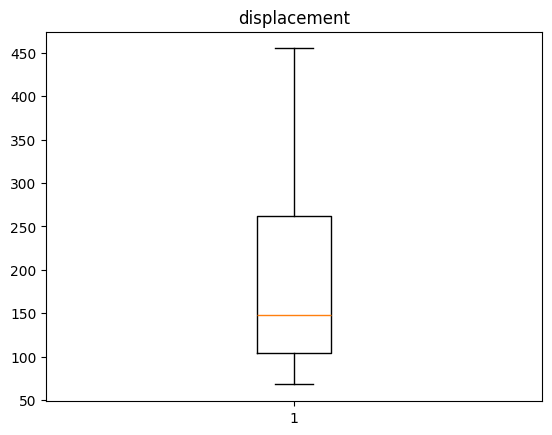

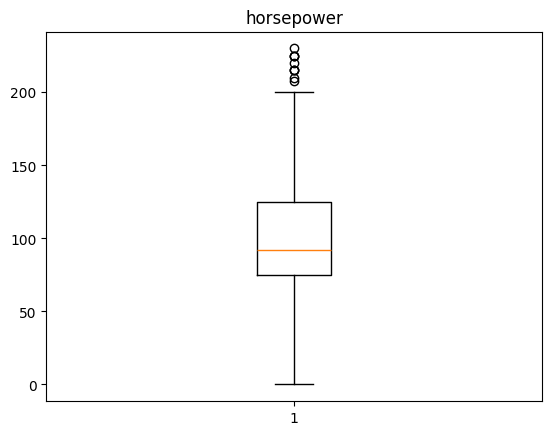

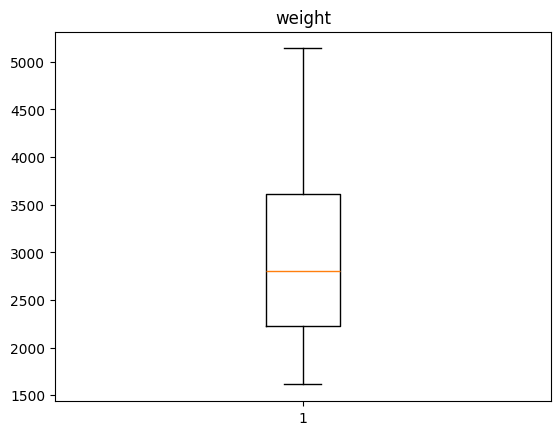

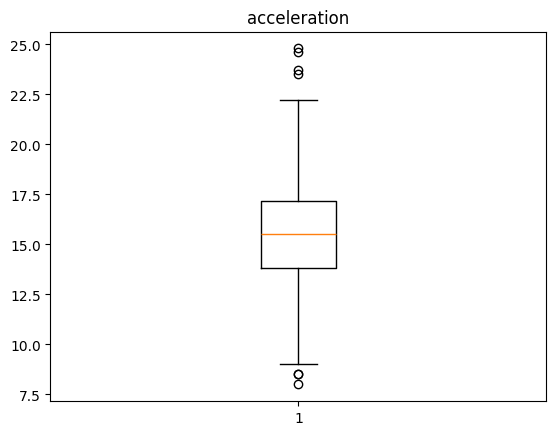

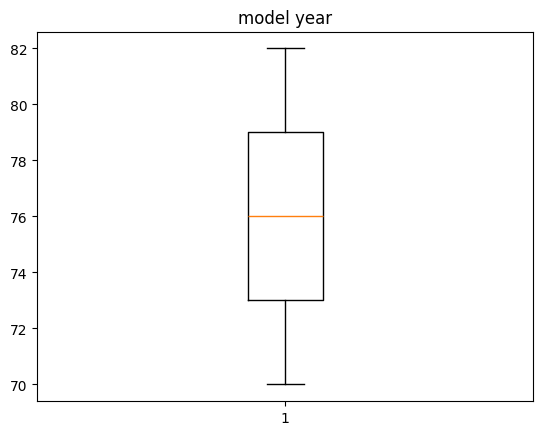

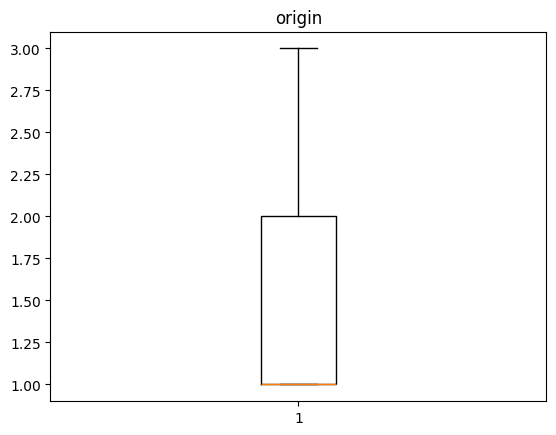

In [109]:
import matplotlib.pyplot as plt
for var in data.columns:
 plt.boxplot(data[var])
 plt.title(var)
 plt.show()

In [110]:
data.origin.unique()
from category_encoders import OneHotEncoder
encoder=OneHotEncoder(cols=["origin"])
data=encoder.fit_transform(data)

In [111]:
# origin=data.pop('origin')
# data['uk']=(origin==1)*1
# data['europe']=(origin==2)*2
# data['usa']=(origin==3)*3
# data

In [112]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [113]:
y=data['mpg']
X=data.drop(columns=['mpg'])

In [114]:
print(X.shape)
print(y.shape)

(398, 9)
(398,)


In [115]:

import numpy as np
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
y = scaler1.fit_transform(np.array(y).reshape(-1, 1))

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [117]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [118]:


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
reg_model=Sequential()
reg_model.add(Dense(units=32,activation="relu"))
reg_model.add(Dense(units=16,activation="relu"))
reg_model.add(Dropout(rate=0.2))
reg_model.add(Dense(16,activation="relu"))
reg_model.add(Dense(1))
reg_model.compile(optimizer="adam",metrics=["mse","mae"],loss="mse")

In [120]:
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
readuce_lr=ReduceLROnPlateau(monitor="val_loss",patience=10,factor=0.2,min_delta=0.001)


early_stopping=EarlyStopping(monitor="mse",patience=20)

moedl_check_point=ModelCheckpoint("reg_model_best.keras",monitor="val_loss",save_best_only=True)
model_fit=reg_model.fit(X_train,y_train,validation_split=0.1,
epochs=200,batch_size=32
              ,callbacks=[readuce_lr,early_stopping,moedl_check_point])

Epoch 1/200
9/9 [==============================] - 2s 91ms/step - loss: 1.0991 - mse: 1.0991 - mae: 0.8577 - val_loss: 0.8165 - val_mse: 0.8165 - val_mae: 0.7625 - lr: 0.0010
Epoch 2/200
9/9 [==============================] - 1s 76ms/step - loss: 0.8915 - mse: 0.8915 - mae: 0.7703 - val_loss: 0.6854 - val_mse: 0.6854 - val_mae: 0.6909 - lr: 0.0010
Epoch 3/200
9/9 [==============================] - 1s 64ms/step - loss: 0.7472 - mse: 0.7472 - mae: 0.6960 - val_loss: 0.5711 - val_mse: 0.5711 - val_mae: 0.6256 - lr: 0.0010
Epoch 4/200
9/9 [==============================] - 1s 65ms/step - loss: 0.6208 - mse: 0.6208 - mae: 0.6202 - val_loss: 0.4726 - val_mse: 0.4726 - val_mae: 0.5606 - lr: 0.0010
Epoch 5/200
9/9 [==============================] - 1s 96ms/step - loss: 0.5621 - mse: 0.5621 - mae: 0.5871 - val_loss: 0.3953 - val_mse: 0.3953 - val_mae: 0.5094 - lr: 0.0010
Epoch 6/200
9/9 [==============================] - 1s 82ms/step - loss: 0.4536 - mse: 0.4536 - mae: 0.5055 - val_loss: 0.3328

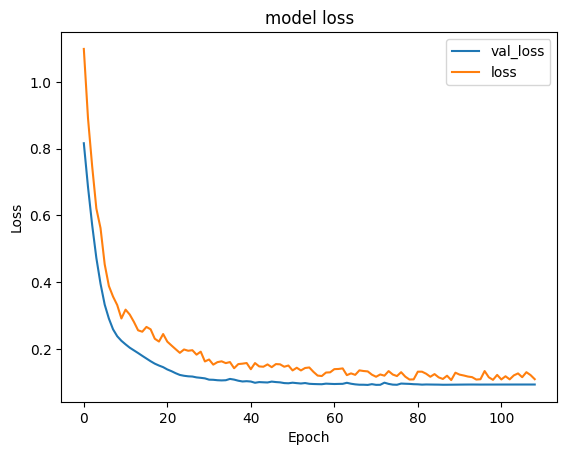

In [121]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history["val_loss"],label="val_loss")
plt.plot(model_fit.history["loss"],label="loss")
plt.title("model loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [122]:
from keras.models import load_model
best_model=load_model("reg_model_best.keras")
y_test_model_pred=best_model.predict(X_test)
y_test_model_pred[:4]

3/3 [==============================] - 0s 7ms/step


array([[ 0.5726243 ],
       [-0.61800313],
       [ 0.8796222 ],
       [-1.0193319 ]], dtype=float32)

In [123]:
loss,mae,mse=reg_model.evaluate(X_test,y_test,verbose=1)

print('Testing mean squared error:MPG', format(mse))

3/3 [==============================] - 0s 16ms/step - loss: 0.0977 - mse: 0.0977 - mae: 0.2296
Testing mean squared error:MPG 0.22958853840827942


In [128]:
y_test_original = scaler1.inverse_transform(y_test)
test_predictions_original = scaler1.inverse_transform(y_test_model_pred)

print(y_test_original[:5])
print(test_predictions_original[:5])

[[23.5]
 [19. ]
 [28.1]
 [15. ]
 [25.5]]
[[27.98457 ]
 [18.690342]
 [30.381044]
 [15.557506]
 [27.202602]]
